In [18]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
# dataset 

train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Dataset imdb_reviews downloaded and prepared to C:\Users\jgaur\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [9]:
## hub layer
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [10]:
# model

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [12]:
## compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
## evaluating the model 
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 6s - loss: 0.9280 - accuracy: 0.4249


In [14]:
for name, value in zip(model.metrics_names, results):
    print("%s: %.3f" % (name, value))

loss: 0.928
accuracy: 0.425


In [19]:
## training

history = model.fit(train_data.batch(512), epochs=20, verbose=1)

Epoch 1/20
30/30 [==============================] - 3s 92ms/step - loss: 0.1537 - accuracy: 0.9451
Epoch 2/20
30/30 [==============================] - 3s 84ms/step - loss: 0.1437 - accuracy: 0.9498
Epoch 3/20
30/30 [==============================] - 2s 80ms/step - loss: 0.1343 - accuracy: 0.9533
Epoch 4/20
30/30 [==============================] - 2s 82ms/step - loss: 0.1256 - accuracy: 0.9573
Epoch 5/20
30/30 [==============================] - 3s 85ms/step - loss: 0.1175 - accuracy: 0.9610
Epoch 6/20
30/30 [==============================] - 3s 91ms/step - loss: 0.1101 - accuracy: 0.9645
Epoch 7/20
30/30 [==============================] - 2s 79ms/step - loss: 0.1032 - accuracy: 0.9673
Epoch 8/20
30/30 [==============================] - 2s 81ms/step - loss: 0.0968 - accuracy: 0.9703
Epoch 9/20
30/30 [==============================] - 3s 85ms/step - loss: 0.0907 - accuracy: 0.9720
Epoch 10/20
30/30 [==============================] - 2s 80ms/step - loss: 0.0851 - accuracy: 0.9746
Epoch 11/

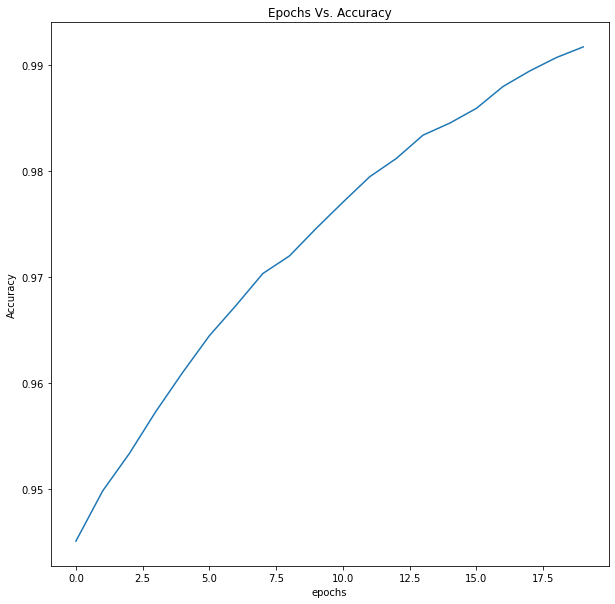

In [21]:
## accuracy vs epoch graph

plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Vs. Accuracy');

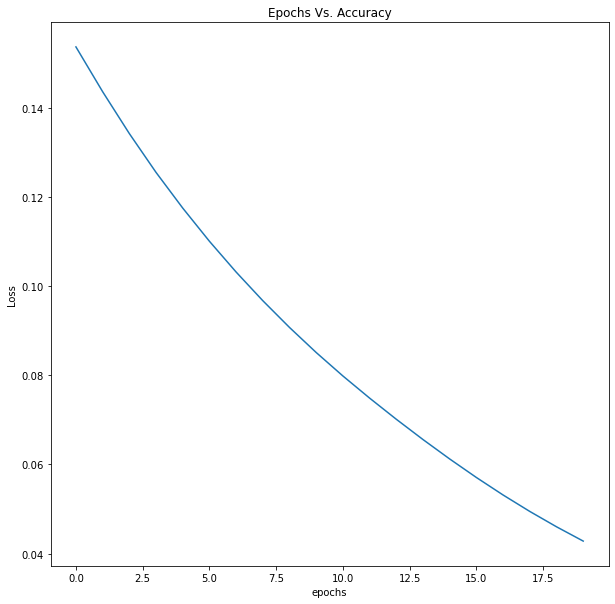

In [22]:
## Loss vs Epoch graph

plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Epochs Vs. Accuracy');